## EDA and Data Preprocessing on Black Friday Dataset


In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
test=pd.read_csv('/kaggle/input/blackfriday/blackfriday_test.csv')

In [4]:
train=pd.read_csv('/kaggle/input/blackfriday/blackfriday_train.csv')

In [5]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [6]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
train['Product_Category_2'].isnull().sum()

173638

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [11]:
last=pd.concat([test,train],ignore_index=True)
last.shape

(783667, 12)

In [12]:
last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [13]:
last.drop(['User_ID'],axis=1,inplace=True)


In [14]:
last.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN


In [15]:
last['Gender']=last['Gender'].map({'F':0,'M':1})



In [16]:
last.rename(columns={'Gender':'Gender M1 F0'},inplace=True)

In [17]:
last.head(20)

,Product_ID,Gender M1 F0,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN
5,P00350442,1,46-50,1,C,3,1,2,3.0,15.0,NaN
6,P00155442,1,46-50,1,C,3,1,1,11.0,15.0,NaN
7,P0094542,1,46-50,1,C,3,1,2,4.0,9.0,NaN
8,P00161842,1,26-35,7,A,1,0,10,13.0,16.0,NaN
9,P00067942,1,18-25,15,A,4+,0,5,14.0,NaN,NaN


In [18]:
last['Age'].value_counts()


Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [19]:
last['Age']=last['Age'].replace({'55+': '55-80'})


In [20]:
last['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55-80     30579
0-17      21334
Name: count, dtype: int64

In [21]:
last[['min_age', 'max_age']] = last['Age'].str.split('-', expand=True).astype(int)


In [22]:
last.drop('Age',axis=1,inplace=True)

In [23]:
last.columns

Index(['Product_ID', 'Gender M1 F0', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'min_age',
       'max_age'],
      dtype='object')

In [24]:
last=last[['Product_ID','min_age','max_age','Gender M1 F0','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2', 'Product_Category_3', 'Purchase']]

In [25]:
last.head()

,Product_ID,min_age,max_age,Gender M1 F0,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,46,50,1,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,26,35,1,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,36,45,0,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,36,45,0,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,26,35,0,1,C,1,0,4,5.0,12.0,NaN


In [26]:
last['City_Category'].unique()

array(['B', 'C', 'A'], dtype=object)

In [27]:
last['City_Category']=last['City_Category'].map({'A':1,'B':2,'C':3})

In [28]:
last.head()

,Product_ID,min_age,max_age,Gender M1 F0,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,46,50,1,7,2,2,1,1,11.0,NaN,NaN
1,P00113442,26,35,1,17,3,0,0,3,5.0,NaN,NaN
2,P00288442,36,45,0,1,2,4+,1,5,14.0,NaN,NaN
3,P00145342,36,45,0,1,2,4+,1,4,9.0,NaN,NaN
4,P00053842,26,35,0,1,3,1,0,4,5.0,12.0,NaN


In [29]:
last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   min_age                     783667 non-null  int64  
 2   max_age                     783667 non-null  int64  
 3   Gender M1 F0                783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [30]:
last['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [31]:
last['Stay_In_Current_City_Years']=last['Stay_In_Current_City_Years'].replace({'4+':4})

In [32]:
last['Stay_In_Current_City_Years']=last['Stay_In_Current_City_Years'].astype(int)

In [33]:
last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   min_age                     783667 non-null  int64  
 2   max_age                     783667 non-null  int64  
 3   Gender M1 F0                783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


In [34]:
## Missing Values 
last.isnull().sum()

Product_ID                         0
min_age                            0
max_age                            0
Gender M1 F0                       0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [35]:
## Replace the missing values with mode
last['Product_Category_2']=last['Product_Category_2'].fillna(8.0)

In [36]:
last['Product_Category_3']=last['Product_Category_3'].fillna(16.0)

In [37]:
last

,Product_ID,min_age,max_age,Gender M1 F0,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,46,50,1,7,2,2,1,1,11.0,16.0,NaN
1,P00113442,26,35,1,17,3,0,0,3,5.0,16.0,NaN
2,P00288442,36,45,0,1,2,4,1,5,14.0,16.0,NaN
3,P00145342,36,45,0,1,2,4,1,4,9.0,16.0,NaN
4,P00053842,26,35,0,1,3,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00372445,51,55,1,13,2,1,1,20,8.0,16.0,368.0
783663,P00375436,26,35,0,1,3,3,0,20,8.0,16.0,371.0
783664,P00375436,26,35,0,15,2,4,1,20,8.0,16.0,137.0
783665,P00375436,55,80,0,1,3,2,0,20,8.0,16.0,365.0


In [38]:
last['Purchase'].unique()

array([   nan,  8370., 15200., ...,   135.,   123.,   613.])

<Axes: xlabel='min_age', ylabel='Purchase'>

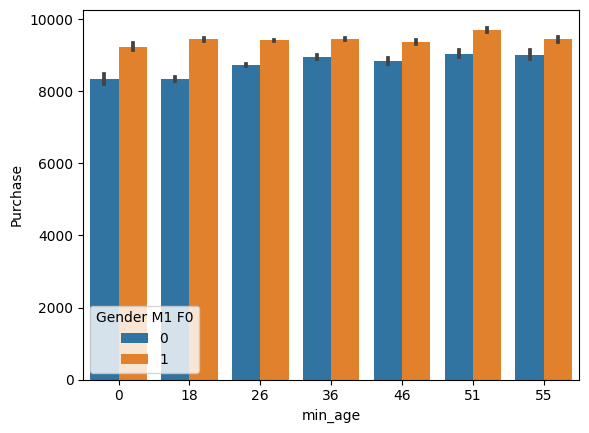

In [39]:
sns.barplot(x='min_age',y='Purchase',hue='Gender M1 F0',data=last)


## Man purchase more than female 
## Range of purchase in all age groups are almost equal

In [40]:
last.groupby('Gender M1 F0')['Purchase'].mean()


Gender M1 F0
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64

In [41]:
last.groupby('min_age')['Purchase'].sum().sort_values(ascending=False).reset_index()


,min_age,Purchase
0,26,2.031771e+09
1,36,1.026570e+09
2,18,9.138487e+08
3,46,4.208434e+08
4,51,3.670996e+08
5,55,2.007674e+08
6,0,1.349132e+08


## 26-35 age group contributed the most revenue 
## High cost purchases was done by age group (51-55)

<Axes: xlabel='max_age', ylabel='Purchase'>

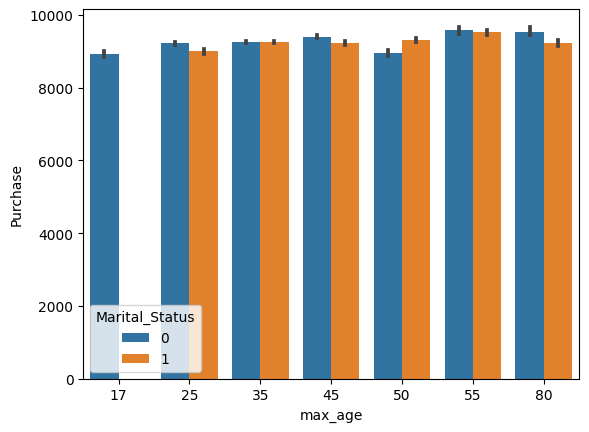

In [42]:
sns.barplot(x='max_age',y='Purchase',hue='Marital_Status',data=last)

In [43]:
last.groupby('Marital_Status')['Purchase'].sum()

Marital_Status
0    3.008927e+09
1    2.086885e+09
Name: Purchase, dtype: float64

In [44]:
last.groupby('City_Category')['Purchase'].mean()


City_Category
1    8911.939216
2    9151.300563
3    9719.920993
Name: Purchase, dtype: float64